In [9]:
%pylab inline
import numpy as np
import numpy.random as rand
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import random as rng
import seaborn as sns
import pickle
import argparse
import pandas as pd 
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rand']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
%cd /home/lansdell/projects/synthfeedback/

/home/lansdell/projects/synthfeedback


## RNN analysis

In [7]:
#methods = ['backprop', 'nodepert', 'feedbackalignment', 'weightsym']
methods = ['backprop', 'nodepert', 'feedbackalignment']
#methods = ['backprop', 'feedbackalignment', 'weightsym']
learning_rate = 5e-6
lmbda = 5e-5
var_xi = 0.5

losses = {}
alignments = {}
n_in_epoch = {}
params = {}

#Load the results
for method in methods:
    print("loading", method)
    fn_in = './experiments/rnn_np/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
    p_in = open(fn_in,"rb")
    losses[method] = np.array(pickle.load(p_in))
    alignments[method] = np.array(pickle.load(p_in))
    n_in_epoch[method] = pickle.load(p_in)
    params[method] = pickle.load(p_in)

loading backprop
loading nodepert
loading feedbackalignment


In [17]:
losses['backprop'].shape

(10, 1400)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


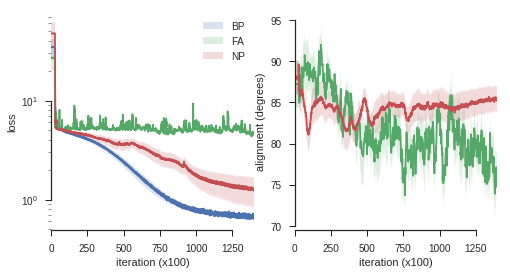

In [24]:
#Make plot of loss for each method
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.tsplot(losses['backprop'], color='C0', ax = axes[0])
sns.tsplot(losses['feedbackalignment'], color = 'C1', ax = axes[0])
#sns.tsplot(losses['weightsym'], color = 'gray')
sns.tsplot(losses['nodepert'], color = 'C2', ax = axes[0])
axes[0].legend(['BP', 'FA', 'NP'])
axes[0].set_xlabel('iteration (x100)')
axes[0].set_ylabel('loss')
axes[0].set_yscale('log')

layer = 1
to_deg = lambda x: 180/np.pi*np.arccos(x)

sns.tsplot(to_deg(alignments['feedbackalignment'][:,:,layer]), color = 'C1', ax = axes[1])
sns.tsplot(to_deg(alignments['nodepert'][:,:,layer]), color = 'C2', ax = axes[1])
axes[1].set_xlabel('iteration (x100)')
axes[1].set_ylabel('alignment (degrees)')

sns.despine(trim = True)
plt.savefig('./figures/delayed_xor_fig4.pdf')